In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [2]:
!ls

AAPL.csv		 NFLX.csv
AMZN.csv		 scikit_learn-0.19.2-cp36-cp36m-manylinux1_x86_64.whl
Arima.ipynb		 Stock
FB.csv			 stock_LSTM-Copy1.ipynb
FBdata.csv		 stock_LSTM.ipynb
fb.ipynb		 stock_LSTM-modular.ipynb
Files			 Stock-Predictor-using-LSTM.ipynb
GOOG.csv		 Stock_prices-master
livelossplot-master	 Stock_prices-master.zip
livelossplot-master.zip  Test.ipynb
lstm.py			 TSLA.csv
model.h5		 TSLAdata.csv
model.json		 Untitled.ipynb


In [3]:
col_names = ['Timestamp','Sequence','Open','High','Low','Close','Volume']
apple = pd.read_csv('AAPL.csv')
apple.columns = col_names
apple['Timestamp'] =  pd.to_datetime(apple['Timestamp'],format='%Y-%m-%d %H:%M:%S')
apple.index = apple['Timestamp']
apple = apple.drop(['Sequence','Timestamp'],axis =1)
apple.head()

,Open,High,Low,Close,Volume
Timestamp,,,,,
2018-03-12 15:49:00,181.5762,181.750,181.5762,181.6900,48721
2018-03-12 15:50:00,181.6986,181.710,181.5700,181.5745,51915
2018-03-12 15:51:00,181.6600,181.720,181.6400,181.6924,32218
2018-03-12 15:52:00,181.5100,181.675,181.5000,181.6700,62321
2018-03-12 15:53:00,181.7200,181.720,181.5100,181.5200,34506


In [4]:
apple = apple.loc['2018-03-13']

In [5]:
col_names = ['Timestamp','Sequence','Open','High','Low','Close','Volume']
tesla = pd.read_csv('NFLX.csv')
tesla.columns = col_names
tesla['Timestamp'] =  pd.to_datetime(tesla['Timestamp'],format='%Y-%m-%d %H:%M:%S')
tesla.index = tesla['Timestamp']
tesla.head()

,Timestamp,Sequence,Open,High,Low,Close,Volume
Timestamp,,,,,,,
2018-03-12 15:49:00,2018-03-12 15:49:00,a1520869740,323.8800,324.1350,323.8000,324.0721,11725
2018-03-12 15:50:00,2018-03-12 15:50:00,1,324.0598,324.1200,323.9000,323.9600,15120
2018-03-12 15:51:00,2018-03-12 15:51:00,2,323.9700,324.0500,323.6000,324.0000,27216
2018-03-12 15:52:00,2018-03-12 15:52:00,3,323.7800,323.9169,323.7202,323.8300,21313
2018-03-12 15:53:00,2018-03-12 15:53:00,4,324.0000,324.0150,323.6400,323.7100,19892


In [6]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31738 entries, 2018-03-12 15:49:00 to 2018-07-06 20:00:00
Data columns (total 7 columns):
Timestamp    31738 non-null datetime64[ns]
Sequence     31738 non-null object
Open         31738 non-null float64
High         31738 non-null float64
Low          31738 non-null float64
Close        31738 non-null float64
Volume       31738 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.9+ MB


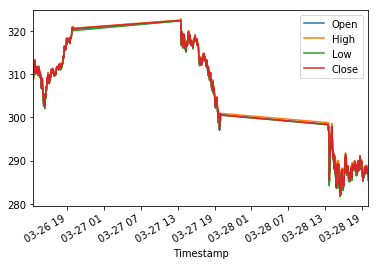

In [107]:
df = tesla.loc['2018-03-26':'2018-03-28'][['Open','High','Low','Close']]
df.plot()
plt.show()

In [108]:
df.shape

(1173, 4)

In [9]:
df = df.resample('1Min').ffill()

In [10]:
df.shape

(3271, 4)

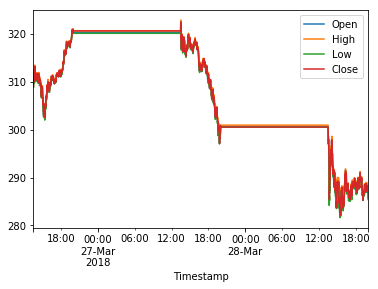

In [11]:
df.plot()
plt.show()

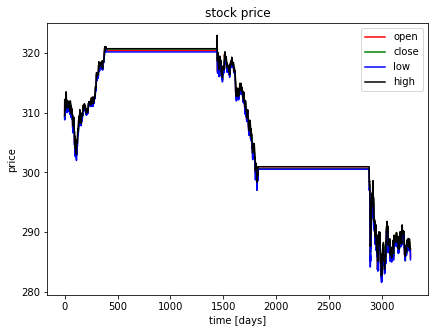

"\nplt.subplot(1,2,2);\nplt.plot(df.Volume.values, color='black', label='volume')\nplt.title('stock volume')\nplt.xlabel('time')\nplt.ylabel('volume')\nplt.legend(loc='best');\n"

In [12]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='close')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()
'''
plt.subplot(1,2,2);
plt.plot(df.Volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time')
plt.ylabel('volume')
plt.legend(loc='best');
'''

In [13]:
df.shape

(3271, 4)

In [14]:
df.head()

,Open,High,Low,Close
Timestamp,,,,
2018-03-26 13:30:00,309.5000,309.50,309.3600,309.3600
2018-03-26 13:31:00,311.7500,312.20,308.7712,308.9500
2018-03-26 13:32:00,311.1300,311.91,310.5000,311.7500
2018-03-26 13:33:00,311.3552,311.83,310.2500,311.0000
2018-03-26 13:34:00,310.4300,311.48,310.0300,311.3605


## 2.Function for testing stationarity

In [15]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15, 5));
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    plt.figure(figsize=(15, 5));
    plt.title('Standard Deviation')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['open','high','10_Min_volatility', '50_Min_moving_avg'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/mapr_data/dev_repo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [101]:
test_df = df[['Close']]

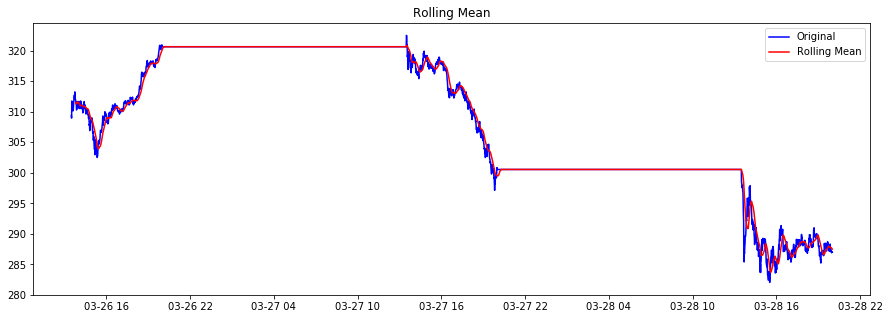

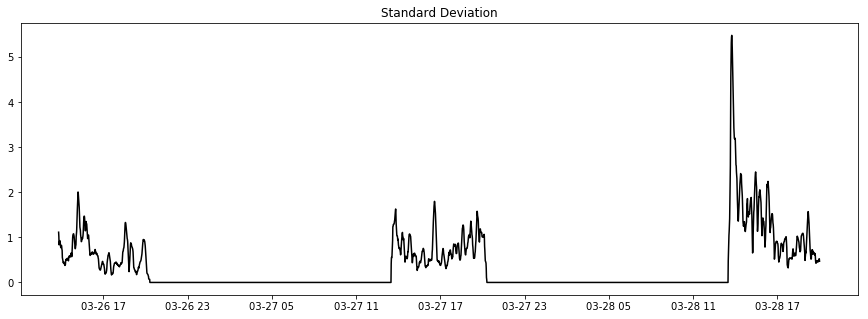

Results of Dickey-Fuller Test:
open                       0.551921
high                       0.986369
10_Min_volatility         28.000000
50_Min_moving_avg       3242.000000
Critical Value (1%)       -3.432369
Critical Value (5%)       -2.862432
Critical Value (10%)      -2.567245
dtype: float64


In [102]:
test_stationarity(test_df)

In [18]:
rolstd = test_df.rolling(20).std()
plt.plot(rolstd, color='black', label = 'Rolling Std')

# Making Data Stationary
## Estimating & Eliminating Trend

In [19]:
ts_log = np.log(test_df)
plt.plot(ts_log)

# Smoothing:
## Moving average

In [20]:
test_df.head()

,Close
Timestamp,
2018-03-26 13:30:00,309.3600
2018-03-26 13:31:00,308.9500
2018-03-26 13:32:00,311.7500
2018-03-26 13:33:00,311.0000
2018-03-26 13:34:00,311.3605


In [21]:
moving_avg = test_df.rolling(10, min_periods=1).mean()
plt.plot(test_df)
plt.plot(moving_avg, color='black')

In [22]:
import pylab
from numpy import polyfit, poly1d, linspace
import matplotlib.pyplot as plt

values = test_df['Close'].tolist()
years = test_df.index.tolist()

In [23]:
plt.plot(years, values)

In [24]:
minutes = list(range(1,392))

In [25]:
plt.figure(figsize=(15, 5));
for i in range(0, len(values)-3):
    z = polyfit(minutes[i:i+3],values[i:i+3], 2)
    p = poly1d(z)
    # extrapolate interpolation by 1
    start_year = minutes[i]
    end_year = minutes[i+3] + 1
    # plot values 
    x = linspace(start_year, end_year, 10)

    y = p(x)
    plt.plot(x, y)

plt.show()

IndexError: list index out of range

In [ ]:
amount_points_used = 250
for i in range(0, len(values)-amount_points_used):
    z = polyfit(minutes[i:i+amount_points_used],
                values[i:i+amount_points_used],2) 

p = poly1d(z)
y = p(251)    
print(y)

In [ ]:
sum(values)/len(values)

In [ ]:
apple.head()

In [ ]:
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY,MinuteLocator
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

def pandas_candlestick_ohlc(dat, stick = "minute", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()
    allminutes = MinuteLocator()
    dayFormatter = DateFormatter('%d')      # e.g., 12
     

    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "minute":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(mdates.date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = 0.5/(24*60))
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
pandas_candlestick_ohlc(apple)

In [ ]:
apple = apple.iloc[:391]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates, ticker
import matplotlib as mpl
from mpl_finance import candlestick_ohlc

mpl.style.use('default')


ohlc_data = []

#for line in range(apple.shape[0]):
#    ohlc_data.append(apple.index.tolist(), apple["Open"].tolist(), apple["High"].tolist(),
#                      apple["Low"].tolist(), apple["Close"].tolist())


fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
candlestick_ohlc(ax1, list(zip(list(mdates.date2num(apple.index.tolist())), apple["Open"].tolist(), apple["High"].tolist(),
                      apple["Low"].tolist(), apple["Close"].tolist())), width = 0.5/(24*60), colorup = 'g', colordown = 'r', alpha = 0.8)

ax1.xaxis.set_major_formatter(dates.DateFormatter('%d/%m/%Y %H:%M'))
ax1.xaxis.set_major_locator(ticker.MaxNLocator(10))

plt.xticks(rotation = 30)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Data EURUSD')
plt.tight_layout()
plt.show()


In [ ]:
apple.shape[0]

In [ ]:
moving_avg.head()

In [ ]:
ts_log_moving_avg_diff   = test_df - moving_avg
ts_log_moving_avg_diff.head(5)

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

In [ ]:
ts_log_moving_avg_diff.shape

In [ ]:
test_stationarity(ts_log_moving_avg_diff)

## Exponentially Weighted Moving Average¶

In [ ]:
expwighted_avg = test_df.ewm(halflife=12).mean()
plt.plot(test_df)
plt.plot(expwighted_avg, color='black')
#expwighted_avg.plot(style='k--')

In [ ]:
ts_log_ewma_diff  = test_df - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Eliminating Trend and Seasonality
## Differencing:

In [123]:
#Take first difference:
ts_log_diff = test_df - test_df.shift()
plt.plot(ts_log_diff)

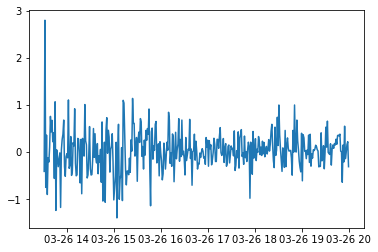

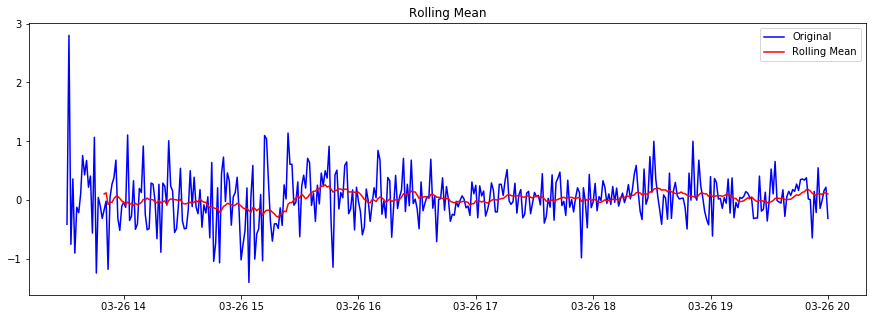

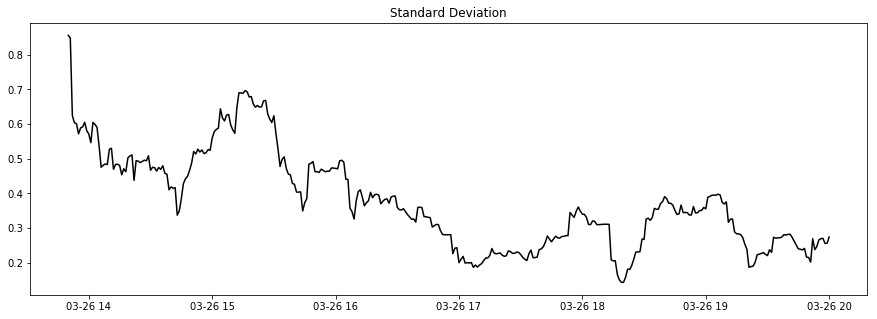

Results of Dickey-Fuller Test:


KeyError: 'Close'

In [124]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Decomposition:

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(test_df, freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(test_df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
trend

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final Forecasting

In [35]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [36]:
fit1 = sm.tsa.statespace.SARIMAX(test_df[:1000], order=(2, 1, 2)).fit()

/mapr_data/dev_repo/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/tools.py:405: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)


In [39]:
fit1.forecast(10)

2018-03-27 06:10:00   NaN
2018-03-27 06:11:00   NaN
2018-03-27 06:12:00   NaN
2018-03-27 06:13:00   NaN
2018-03-27 06:14:00   NaN
2018-03-27 06:15:00   NaN
2018-03-27 06:16:00   NaN
2018-03-27 06:17:00   NaN
2018-03-27 06:18:00   NaN
2018-03-27 06:19:00   NaN
Freq: T, dtype: float64

In [33]:
test_df.shape

(3271, 1)

In [278]:
history = test_df[:250]
test = test_df[250:]
predictions = list()

In [156]:
import datetime

In [157]:
a + datetime.timedelta(minutes=1)

Timestamp('2018-03-26 13:31:00')

In [170]:
history

Timestamp
2018-03-26 13:30:00    309.3600
2018-03-26 13:31:00    308.9500
2018-03-26 13:32:00    311.7500
2018-03-26 13:33:00    311.0000
2018-03-26 13:34:00    311.3605
2018-03-26 13:35:00    310.4600
2018-03-26 13:36:00    310.3400
2018-03-26 13:37:00    310.1278
2018-03-26 13:38:00    310.2377
2018-03-26 13:39:00    310.9961
2018-03-26 13:40:00    311.4250
2018-03-26 13:41:00    312.1000
2018-03-26 13:42:00    312.3200
2018-03-26 13:43:00    312.7300
2018-03-26 13:44:00    312.1705
2018-03-26 13:45:00    313.2387
2018-03-26 13:46:00    312.0000
2018-03-26 13:47:00    312.0470
2018-03-26 13:48:00    311.9500
2018-03-26 13:49:00    311.6400
2018-03-26 13:50:00    311.4763
2018-03-26 13:51:00    311.4600
2018-03-26 13:52:00    310.2845
2018-03-26 13:53:00    310.3300
2018-03-26 13:54:00    310.6000
2018-03-26 13:55:00    310.9800
2018-03-26 13:56:00    311.6600
2018-03-26 13:57:00    311.3500
2018-03-26 13:58:00    310.8356
2018-03-26 13:59:00    310.7350
2018-03-26 14:00:00    310.700

In [159]:
history.append(obs,ignore_index=True)

TypeError: cannot concatenate a non-NDFrame object

In [155]:
a  = history.index[0]

In [182]:
model = ARIMA(history, order=(8 ,1 ,7))
model_fit = model.fit(disp=0)
output = model_fit.forecast()
print(output)

(array([ 311.47485797]), array([ 0.46339102]), array([[ 310.56662825,  312.38308768]]))


/mapr_data/dev_repo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/mapr_data/dev_repo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [194]:
history

Timestamp
2018-03-26 13:30:00    309.3600
2018-03-26 13:31:00    308.9500
2018-03-26 13:32:00    311.7500
2018-03-26 13:33:00    311.0000
2018-03-26 13:34:00    311.3605
2018-03-26 13:35:00    310.4600
2018-03-26 13:36:00    310.3400
2018-03-26 13:37:00    310.1278
2018-03-26 13:38:00    310.2377
2018-03-26 13:39:00    310.9961
2018-03-26 13:40:00    311.4250
2018-03-26 13:41:00    312.1000
2018-03-26 13:42:00    312.3200
2018-03-26 13:43:00    312.7300
2018-03-26 13:44:00    312.1705
2018-03-26 13:45:00    313.2387
2018-03-26 13:46:00    312.0000
2018-03-26 13:47:00    312.0470
2018-03-26 13:48:00    311.9500
2018-03-26 13:49:00    311.6400
2018-03-26 13:50:00    311.4763
2018-03-26 13:51:00    311.4600
2018-03-26 13:52:00    310.2845
2018-03-26 13:53:00    310.3300
2018-03-26 13:54:00    310.6000
2018-03-26 13:55:00    310.9800
2018-03-26 13:56:00    311.6600
2018-03-26 13:57:00    311.3500
2018-03-26 13:58:00    310.8356
2018-03-26 13:59:00    310.7350
2018-03-26 14:00:00    310.700

In [195]:
ind = history.index[-1] +  datetime.timedelta(minutes=1)
history.append(pd.Series(output[0],index=[ind]))

2018-03-26 13:30:00    309.360000
2018-03-26 13:31:00    308.950000
2018-03-26 13:32:00    311.750000
2018-03-26 13:33:00    311.000000
2018-03-26 13:34:00    311.360500
2018-03-26 13:35:00    310.460000
2018-03-26 13:36:00    310.340000
2018-03-26 13:37:00    310.127800
2018-03-26 13:38:00    310.237700
2018-03-26 13:39:00    310.996100
2018-03-26 13:40:00    311.425000
2018-03-26 13:41:00    312.100000
2018-03-26 13:42:00    312.320000
2018-03-26 13:43:00    312.730000
2018-03-26 13:44:00    312.170500
2018-03-26 13:45:00    313.238700
2018-03-26 13:46:00    312.000000
2018-03-26 13:47:00    312.047000
2018-03-26 13:48:00    311.950000
2018-03-26 13:49:00    311.640000
2018-03-26 13:50:00    311.476300
2018-03-26 13:51:00    311.460000
2018-03-26 13:52:00    310.284500
2018-03-26 13:53:00    310.330000
2018-03-26 13:54:00    310.600000
2018-03-26 13:55:00    310.980000
2018-03-26 13:56:00    311.660000
2018-03-26 13:57:00    311.350000
2018-03-26 13:58:00    310.835600
2018-03-26 13:

In [227]:
history = history.dropna(inplace=True)

In [192]:
ind = history.index[-1] +  datetime.timedelta(minutes=1)
print(ind)
a = pd.Series(output[0],index=[ind])
#print(a)    
history = history.append(a)
print()

2018-03-26 17:40:00



In [ ]:
for t in range(len(test)):
    history = history.dropna()
    model = ARIMA (history, order=(4,2,3))
    model_fit = model.fit(disp=0,maxiter=2000,solver='nm')
    output = model_fit.forecast()
    
    print(output)
    yhat = output[0]
    print(yhat[0])
    predictions.append(yhat[0])
    obs = test[t]
    
    
    ind = history.index[-1] +  datetime.timedelta(minutes=1)
    a = pd.Series(yhat,index=[ind])
    
    history = history.append(a)
    print('predicted=%f, expected=%f' % (yhat, obs))


/mapr_data/dev_repo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(array([ 318.46967479]), array([ 0.37701068]), array([[ 317.73074744,  319.20860214]]))
318.469674788
predicted=318.469675, expected=311.190000


/mapr_data/dev_repo/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/mapr_data/dev_repo/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/mapr_data/dev_repo/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/mapr_data/dev_repo/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/mapr_data/dev_repo/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/mapr_data/dev_repo/ana

(array([ 318.53421393]), array([ 0.37652689]), array([[ 317.79623478,  319.27219308]]))
318.534213932
predicted=318.534214, expected=311.490000
(array([ 318.59852985]), array([ 0.37604497]), array([[ 317.86149525,  319.33556445]]))
318.598529851
predicted=318.598530, expected=311.864700
(array([ 318.66347209]), array([ 0.3755649]), array([[ 317.92737842,  319.39956576]]))
318.663472092
predicted=318.663472, expected=312.342000
(array([ 318.72813469]), array([ 0.37508666]), array([[ 317.99297835,  319.46329102]]))
318.728134686
predicted=318.728135, expected=312.250000
(array([ 318.7934256]), array([ 0.37461024]), array([[ 318.05920302,  319.52764817]]))
318.793425598
predicted=318.793426, expected=312.230000
(array([ 318.85849307]), array([ 0.37413563]), array([[ 318.12520071,  319.59178542]]))
318.858493065
predicted=318.858493, expected=311.970000
(array([ 318.92417435]), array([ 0.37366283]), array([[ 318.19180866,  319.65654004]]))
318.92417435
predicted=318.924174, expected=312.31

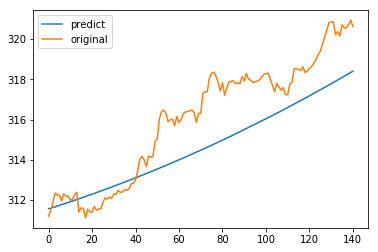

In [292]:
plt.plot(predictions,label='predict')
plt.plot(test_df[-141:].values,label='original')
plt.legend()
plt.show()

In [164]:
history

Timestamp
2018-03-26 13:30:00    309.3600
2018-03-26 13:31:00    308.9500
2018-03-26 13:32:00    311.7500
2018-03-26 13:33:00    311.0000
2018-03-26 13:34:00    311.3605
2018-03-26 13:35:00    310.4600
2018-03-26 13:36:00    310.3400
2018-03-26 13:37:00    310.1278
2018-03-26 13:38:00    310.2377
2018-03-26 13:39:00    310.9961
2018-03-26 13:40:00    311.4250
2018-03-26 13:41:00    312.1000
2018-03-26 13:42:00    312.3200
2018-03-26 13:43:00    312.7300
2018-03-26 13:44:00    312.1705
2018-03-26 13:45:00    313.2387
2018-03-26 13:46:00    312.0000
2018-03-26 13:47:00    312.0470
2018-03-26 13:48:00    311.9500
2018-03-26 13:49:00    311.6400
2018-03-26 13:50:00    311.4763
2018-03-26 13:51:00    311.4600
2018-03-26 13:52:00    310.2845
2018-03-26 13:53:00    310.3300
2018-03-26 13:54:00    310.6000
2018-03-26 13:55:00    310.9800
2018-03-26 13:56:00    311.6600
2018-03-26 13:57:00    311.3500
2018-03-26 13:58:00    310.8356
2018-03-26 13:59:00    310.7350
2018-03-26 14:00:00    310.700

## ACF & PACF Plots

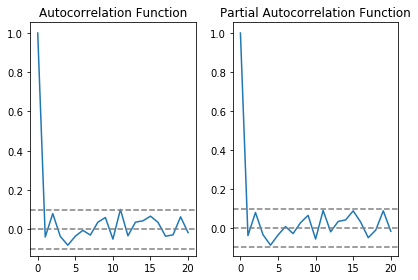

In [220]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff.iloc[:1500], nlags=20)
lag_pacf = pacf(ts_log_diff.iloc[:1500], nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

## AR Model:

In [ ]:
#MA model:
model = ARIMA(test_df, order=(2, 1, 0))  
results_AR = model.fit(disp=-1,trend='nc')  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='black')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff['Close'])**2))
plt.show()

## MA Model

In [ ]:
model = ARIMA(test_df, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='black')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff['Close'])**2))
plt.show()

## ARIMA Model:

In [ ]:
tst = test_df.iloc[:200] - test_df[:200].shift()

In [ ]:
np.log(tst[1:]).dropna()

In [26]:
model = ARIMA(test_df.iloc[:1000],order=(7,1,6))  
results_ARIMA = model.fit(disp=1,trend = 'c',alpha= 0.05,solver = 'powell',max_iter = 2000)
#plt.plot(ts_log_diff)
#plt.plot(results_ARIMA.fittedvalues, color='black')
result = results_ARIMA.forecast(100)[0]
#plt.title('RSS (Root Squared Sum): %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff['Close'].iloc[:386])**2))
#plt.show()


NameError: name 'ARIMA' is not defined

In [ ]:
#['Close'].values

In [ ]:
test_df.iloc[1000:]

In [ ]:
result =result.reshape(len(result),1)

In [ ]:
#test_df.iloc[300:].values + result

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
result

In [ ]:
new_res = [1]
new_res[0]=1

In [ ]:
new_res= [test_df.iloc[200].values]
for i in range(0,190):
    new_res.append(new_res[i]+result[i]*100)


In [ ]:
print(test_df.iloc[200:].values)

In [ ]:
plt.plot(new_res)
plt.show()

In [ ]:
print(test_df.iloc[200]+result[1])
print(test_df.iloc[205])
plt.plot(test_df.iloc[200:].values + result)
#plt.plot(test_df.iloc[200:].values)
plt.show()

In [ ]:
plt.plot(test_df.iloc[300:]['Close'].values)
plt.plot(result)
plt.show()

In [ ]:
result = results_ARIMA.forecast(11)[0]

In [ ]:
results_ARIMA.forecast(40)

## Convert to original scale:

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

In [ ]:
predictions_ARIMA_diff.plot()

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

In [ ]:
predictions_ARIMA_diff_cumsum.plot()

In [ ]:
predictions_ARIMA_log = pd.Series(test_df.iloc[0], index=test_df.index)
predictions_ARIMA_log.iloc[:] = test_df.iloc[0].values[0]
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head() 

In [ ]:
predictions_ARIMA_log.plot()

In [ ]:
plt.plot(test_df)
plt.plot(predictions_ARIMA_log)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_df.iloc[380:]['Close'], result)

In [ ]:
np.log(np.e)

In [ ]:
#predictions_ARIMA = predictions_ARIMA_log
plt.plot(test_df.iloc[386:])
plt.plot(test_df.iloc[386:].index,result)

In [ ]:
predictions_ARIMA = predictions_ARIMA_log
plt.plot(test_df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-test_df['Close'])**2)/len(test_df)))
plt.show()

In [103]:
test_df.reset_index(drop=True,inplace=True)
test_df

,Close
0,309.3600
1,308.9500
2,311.7500
3,311.0000
4,311.3605
5,310.4600
6,310.3400
7,310.1278
8,310.2377
9,310.9961


In [118]:
test_df = df.loc['2018-03-26 ']['Close']

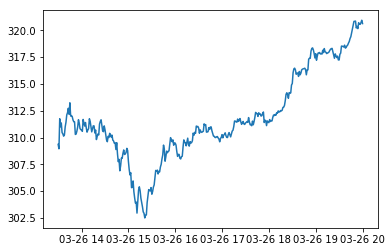

In [119]:

plt.plot(test_df)
plt.show()

In [111]:
test_df = df[['Close']]

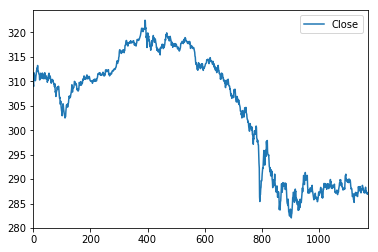

In [114]:
test_df.reset_index(inplace=True)
test_df.plot()
plt.show()